In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
#f = r.TFile("./data/gm2offline_ana_merged.root")
#f = r.TFile("./data/gm2offline_ana_run16355.root")
f = r.TFile("./data/gm2offline_ana_7893458_15937.00027.root")
#f = r.TFile("./data/60hour/gm2offline_ana_7893505_15982.00104.root")
#f.cd("clusterTree")
f.cd("CoincidenceFinderLM")
f.ls()

TFile**		./data/gm2offline_ana_7893458_15937.00027.root	
 TFile*		./data/gm2offline_ana_7893458_15937.00027.root	
  TDirectoryFile*		CoincidenceFinderLM	CoincidenceFinderLM (CoincidenceFinderLM) folder
   KEY: TTree	CoincLM;143	CoincLM
   KEY: TTree	CoincLM;142	CoincLM
   KEY: TH1D	caloNumdouble_;1	Double Coincidence: hits vs calo number - double/singles = 0.0897
   KEY: TH1D	caloNumtriple_;1	Triple Coincidence: hits vs calo number - triple/singles = 0.0197
   KEY: TH2D	clusterTimecaloNumdouble_;1	Double Coincidence: cluster time vs calo num
   KEY: TH2D	clusterTimecaloNumtriple_;1	Triple Coincidence: cluster time vs calo num
   KEY: TH1D	coincDoubleTriple;1	Ratio of double (0.0897) and triple (0.0197) coincidence LM candidates to singles
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder


In [3]:
t = f.Get("CoincidenceFinderLM").Get("CoincLM")
t.Print()

******************************************************************************
*Tree    :CoincLM   : CoincLM                                                *
*Entries : 101833887 : Total =     15585334747 bytes  File  Size = 3930188262 *
*        :          : Tree compression factor =   3.97                       *
******************************************************************************
*Br    0 :coincidenceLevel : coincidenceLevel/i                              *
*Entries :101833887 : Total  Size=  407360489 bytes  File Size  =    2310809 *
*Baskets :      232 : Basket Size=    6735360 bytes  Compression= 176.28     *
*............................................................................*
*Br    1 :caloNum   : vector<int>                                            *
*Entries :101833887 : Total  Size= 1842711609 bytes  File Size  =  166652577 *
*Baskets :      638 : Basket Size=   25600000 bytes  Compression=  11.06     *
*..................................................

In [4]:
#nentries = t.Draw("clusterY:clusterX:caloNum:clusterEnergy","coincidenceLevel==3","goff")

In [5]:
#print(type(t.GetV1()))

In [6]:
'''vecCalo1X = []
vecCalo1Y = []
vecCalo2X = []
vecCalo2Y = []
vecCalo3X = []
vecCalo3Y = []

counter = 0
caloLM = []

for entry in t:
    if (counter % 1000000 == 0):
        print("Processed", counter, "events (",counter/101833887*100,"% complete )")
    if (entry.clusterX.size() == 3 and (entry.caloNum[1] == 2) ):
        vecCalo2X.append( entry.clusterX[1] )
        vecCalo2Y.append( entry.clusterY[1] )
        vecCalo1X.append( entry.clusterX[0] )
        vecCalo1Y.append( entry.clusterY[0] )
        vecCalo3X.append( entry.clusterX[2] )
        vecCalo3Y.append( entry.clusterY[2] )
        caloLM.append((entry.clusterX[0], entry.clusterY[0],entry.clusterX[1], 
                       entry.clusterY[1],entry.clusterX[2], entry.clusterY[2]))
    counter = counter + 1'''

'vecCalo1X = []\nvecCalo1Y = []\nvecCalo2X = []\nvecCalo2Y = []\nvecCalo3X = []\nvecCalo3Y = []\n\ncounter = 0\ncaloLM = []\n\nfor entry in t:\n    if (counter % 1000000 == 0):\n        print("Processed", counter, "events (",counter/101833887*100,"% complete )")\n    if (entry.clusterX.size() == 3 and (entry.caloNum[1] == 2) ):\n        vecCalo2X.append( entry.clusterX[1] )\n        vecCalo2Y.append( entry.clusterY[1] )\n        vecCalo1X.append( entry.clusterX[0] )\n        vecCalo1Y.append( entry.clusterY[0] )\n        vecCalo3X.append( entry.clusterX[2] )\n        vecCalo3Y.append( entry.clusterY[2] )\n        caloLM.append((entry.clusterX[0], entry.clusterY[0],entry.clusterX[1], \n                       entry.clusterY[1],entry.clusterX[2], entry.clusterY[2]))\n    counter = counter + 1'

In [7]:
'''import csv
out = open('./data/calo_data_output_lostMuons_1_2_3.csv','w')
csv_out = csv.writer(out)
csv_out.writerow(['Calo1X','Calo1Y','Calo2X','Calo2Y','Calo3X','Calo3Y',])
for item in caloLM:
    csv_out.writerow(item)
out.close()'''

"import csv\nout = open('./data/calo_data_output_lostMuons_1_2_3.csv','w')\ncsv_out = csv.writer(out)\ncsv_out.writerow(['Calo1X','Calo1Y','Calo2X','Calo2Y','Calo3X','Calo3Y',])\nfor item in caloLM:\n    csv_out.writerow(item)\nout.close()"

In [8]:
'''vecCalo7X = []
vecCalo7Y = []
vecCalo8X = []
vecCalo8Y = []
vecCalo9X = []
vecCalo9Y = []

counter = 0

caloLM2 = []

for entry in t:
    if (counter % 1000000 == 0):
        print("Processed", counter, "events (",counter/101833887*100,"% complete )")
    if (entry.clusterX.size() == 3 and (entry.caloNum[1] == 8) ):
        vecCalo8X.append( entry.clusterX[1] )
        vecCalo8Y.append( entry.clusterY[1] )
        vecCalo7X.append( entry.clusterX[0] )
        vecCalo7Y.append( entry.clusterY[0] )
        vecCalo9X.append( entry.clusterX[2] )
        vecCalo9Y.append( entry.clusterY[2] )
        
        caloLM2.append((entry.clusterX[0], entry.clusterY[0],entry.clusterX[1], 
                       entry.clusterY[1],entry.clusterX[2], entry.clusterY[2]))
        
    counter = counter + 1'''

'vecCalo7X = []\nvecCalo7Y = []\nvecCalo8X = []\nvecCalo8Y = []\nvecCalo9X = []\nvecCalo9Y = []\n\ncounter = 0\n\ncaloLM2 = []\n\nfor entry in t:\n    if (counter % 1000000 == 0):\n        print("Processed", counter, "events (",counter/101833887*100,"% complete )")\n    if (entry.clusterX.size() == 3 and (entry.caloNum[1] == 8) ):\n        vecCalo8X.append( entry.clusterX[1] )\n        vecCalo8Y.append( entry.clusterY[1] )\n        vecCalo7X.append( entry.clusterX[0] )\n        vecCalo7Y.append( entry.clusterY[0] )\n        vecCalo9X.append( entry.clusterX[2] )\n        vecCalo9Y.append( entry.clusterY[2] )\n        \n        caloLM2.append((entry.clusterX[0], entry.clusterY[0],entry.clusterX[1], \n                       entry.clusterY[1],entry.clusterX[2], entry.clusterY[2]))\n        \n    counter = counter + 1'

In [9]:
'''import csv
out = open('./data/calo_data_output_lostMuons_7_8_9.csv','w')
csv_out = csv.writer(out)
csv_out.writerow(['Calo1X','Calo1Y','Calo2X','Calo2Y','Calo3X','Calo3Y'])
for item in caloLM2:
    csv_out.writerow(item)
out.close()'''

"import csv\nout = open('./data/calo_data_output_lostMuons_7_8_9.csv','w')\ncsv_out = csv.writer(out)\ncsv_out.writerow(['Calo1X','Calo1Y','Calo2X','Calo2Y','Calo3X','Calo3Y'])\nfor item in caloLM2:\n    csv_out.writerow(item)\nout.close()"

In [10]:
'''import csv
out = open('./data/calo_data_output_lostMuons_all_CL3_7893505.csv','w')
csv_out = csv.writer(out)
csv_out.writerow(['CaloAX','CaloAY','CaloBX','CaloBY','CaloCX','CaloCY','StartingCalo'])


for i in range(25):
    print("Beginning Calo:",i+1)
    startingCalo = i+1
    counter = 0
    caloLMx = []

    for entry in t:
        if (counter % 10000000 == 0):
            print("     Processed", counter, "events (",counter/125807767*100,"% complete )")
        if (entry.clusterX.size() == 3 and (entry.caloNum[0] == startingCalo) ):

            csv_out.writerow((entry.clusterX[0], entry.clusterY[0],entry.clusterX[1], 
                           entry.clusterY[1],entry.clusterX[2], entry.clusterY[2], startingCalo))

        counter = counter + 1
out.close()'''

'import csv\nout = open(\'./data/calo_data_output_lostMuons_all_CL3_7893505.csv\',\'w\')\ncsv_out = csv.writer(out)\ncsv_out.writerow([\'CaloAX\',\'CaloAY\',\'CaloBX\',\'CaloBY\',\'CaloCX\',\'CaloCY\',\'StartingCalo\'])\n\n\nfor i in range(25):\n    print("Beginning Calo:",i+1)\n    startingCalo = i+1\n    counter = 0\n    caloLMx = []\n\n    for entry in t:\n        if (counter % 10000000 == 0):\n            print("     Processed", counter, "events (",counter/125807767*100,"% complete )")\n        if (entry.clusterX.size() == 3 and (entry.caloNum[0] == startingCalo) ):\n\n            csv_out.writerow((entry.clusterX[0], entry.clusterY[0],entry.clusterX[1], \n                           entry.clusterY[1],entry.clusterX[2], entry.clusterY[2], startingCalo))\n\n        counter = counter + 1\nout.close()'

In [11]:
import csv
out = open('./data/calo_data_output_lostMuons_all_CL3_7893458.csv','w')
csv_out = csv.writer(out)
csv_out.writerow(['CaloAX','CaloAY','CaloBX','CaloBY','CaloCX','CaloCY','StartingCalo'])

counter = 0
for entry in t:
    if (counter % 10000000 == 0):
        print("Processed", counter, "events (",counter/125807767*100,"% complete )")
    if ( entry.clusterX.size() == 3 ):
        startingCalo = entry.caloNum[0]
        csv_out.writerow((entry.clusterX[0], entry.clusterY[0],entry.clusterX[1], 
                       entry.clusterY[1],entry.clusterX[2], entry.clusterY[2], startingCalo))

    counter = counter + 1
        
print("All done.")

Processed 0 events ( 0.0 % complete )
Processed 10000000 events ( 7.94863484064541 % complete )
Processed 20000000 events ( 15.89726968129082 % complete )
Processed 30000000 events ( 23.845904521936234 % complete )
Processed 40000000 events ( 31.79453936258164 % complete )
Processed 50000000 events ( 39.743174203227056 % complete )
Processed 60000000 events ( 47.69180904387247 % complete )
Processed 70000000 events ( 55.64044388451788 % complete )
Processed 80000000 events ( 63.58907872516328 % complete )
Processed 90000000 events ( 71.5377135658087 % complete )
Processed 100000000 events ( 79.48634840645411 % complete )
Processed 110000000 events ( 87.43498324709952 % complete )
Processed 120000000 events ( 95.38361808774494 % complete )
All done.


In [15]:
import csv
out = open('./data/calo_data_output_lostMuons_all_CL4_7893505_test.csv','w')
csv_out = csv.writer(out)
csv_out.writerow(['CaloAX','CaloAY','CaloBX','CaloBY','CaloCX','CaloCY','CaloDX','CaloDY','StartingCalo'])

counter = 0
counter2 = 0
for entry in t:
    if (counter % 10000000 == 0):
        print("Processed", counter, "events (",counter/101833887*100,"% complete )")
    if (entry.clusterX.size() == 4 ):
        startingCalo = entry.caloNum[0]
        csv_out.writerow((entry.clusterX[0], entry.clusterY[0],
                          entry.clusterX[1], entry.clusterY[1],
                          entry.clusterX[2], entry.clusterY[2],
                          entry.clusterX[3], entry.clusterY[3],
                          startingCalo))
        if (startingCalo == 2):
            counter2 = counter2+1

    counter = counter + 1
        
print("All done.")
print(counter2,"with starting calo = 2")
out.close()

Processed 0 events ( 0.0 % complete )
Processed 10000000 events ( 9.819913876016537 % complete )
Processed 20000000 events ( 19.639827752033074 % complete )
Processed 30000000 events ( 29.459741628049606 % complete )
Processed 40000000 events ( 39.27965550406615 % complete )
Processed 50000000 events ( 49.09956938008268 % complete )
Processed 60000000 events ( 58.91948325609921 % complete )
Processed 70000000 events ( 68.73939713211576 % complete )
Processed 80000000 events ( 78.5593110081323 % complete )
Processed 90000000 events ( 88.37922488414883 % complete )
Processed 100000000 events ( 98.19913876016535 % complete )
All done.
617 with starting calo = 2


In [13]:
out.close()

In [5]:
import csv
out = open('./data/calo_data_output_lostMuons_all_CL2_7893458.csv','w')
csv_out = csv.writer(out)
csv_out.writerow(['CaloAX','CaloAY','CaloBX','CaloBY','StartingCalo'])

counter = 0
for entry in t:
    if (counter % 10000000 == 0):
        print("Processed", counter, "events (",counter/101833887*100,"% complete )")
    if (entry.clusterX.size() == 2 ):
        startingCalo = entry.caloNum[0]
        csv_out.writerow((entry.clusterX[0], entry.clusterY[0],
                          entry.clusterX[1], entry.clusterY[1], 
                          startingCalo))

    counter = counter + 1
        
print("All done.")
out.close()

Processed 0 events ( 0.0 % complete )
Processed 10000000 events ( 9.819913876016537 % complete )
Processed 20000000 events ( 19.639827752033074 % complete )
Processed 30000000 events ( 29.459741628049606 % complete )
Processed 40000000 events ( 39.27965550406615 % complete )
Processed 50000000 events ( 49.09956938008268 % complete )
Processed 60000000 events ( 58.91948325609921 % complete )
Processed 70000000 events ( 68.73939713211576 % complete )
Processed 80000000 events ( 78.5593110081323 % complete )
Processed 90000000 events ( 88.37922488414883 % complete )
Processed 100000000 events ( 98.19913876016535 % complete )
All done.


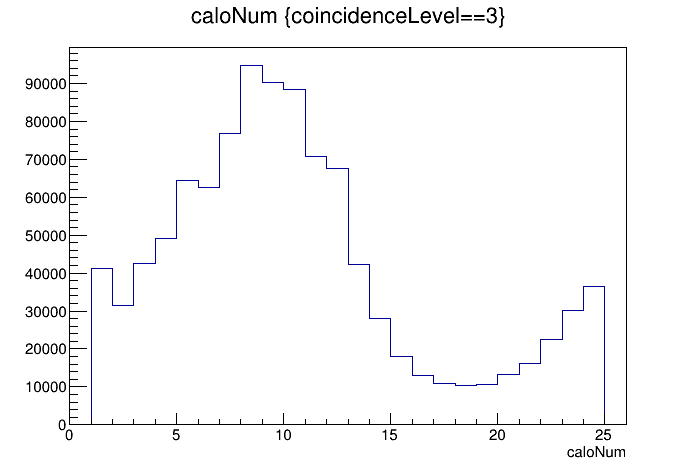

In [8]:
c = r.TCanvas()
t.Draw("caloNum","coincidenceLevel==3","")
c.Draw()

202356 67452.0


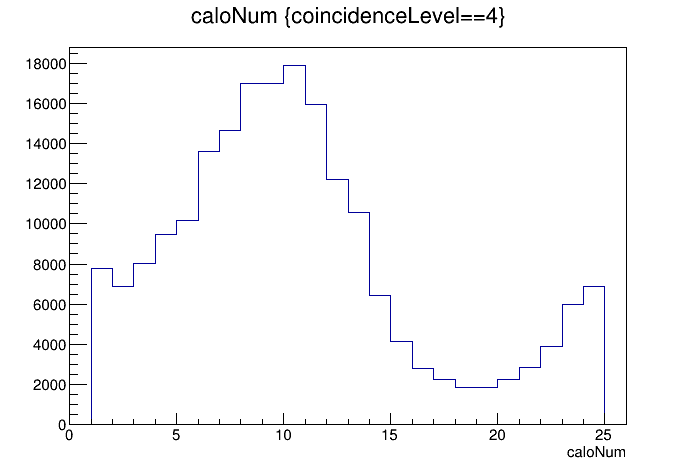

In [12]:
c = r.TCanvas()
countnum = t.Draw("caloNum","coincidenceLevel==4","")
print(countnum, countnum/3)
c.Draw()

6900 2300.0


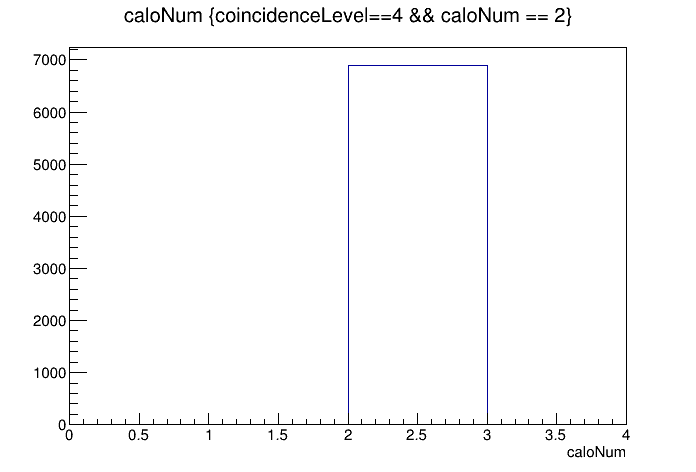

In [14]:
c = r.TCanvas()
countnum = t.Draw("caloNum","coincidenceLevel==4 && caloNum == 2","")
print(countnum, countnum/3)
c.Draw()